# Final Notebook Pt 1: means2work, race/eth, income, nbhooods

**By:** Andrew Williams and Ben Brassette
    
**Description:** This notebook is building on earlier queries of means to work. Purpose is to intergrate and align race/eth and median income data. We are tacking points 1, 3, 4, 5, and 7 in this notebook.

**Expected Outputs**
* Trimmed data high transit areas--use same tracts for trimmed race/eth and median income data
* Descriptive Statistics: Bar graphs of race/eth and income by using high public transit data
* Side by side maps

**Areas Where We Need More Work**
* Spatial Statistics of means2work
* Overlay of rail stops and bus lines
* Descriptive Statistics of Access to Car
* Inclusion of commute time and access to car maps (by high transit query)
* Descriptive Statistics of Jobs
* Interactive Map using some combination of our datasets

**Notes for self to advance project:**
1. Biggest step forward, intergrating our notebooks in the remaining few weeks in a targeted fashion
2.  Overlay heavy rail and light rail stops
3.  Provide more accurate description of the areas through a spatial join
4. Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
5. Query "high" transit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
6. Availability of cars in households
7. Bring a shaprer focus to Central LA and the San Fernando Valley

**TOC**
* Section 2: Library Imports
* Section 3: Mode of Travel
* Section 4: Race/Eth and Income
* Section 5: Public Transit Query
* Section 6: Attribute Merge
* Section 7: Matching Tracts
* Section 8: Graphs
* Section 9: Maps

# Library Import 


Importing various libaries

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Libraries good to go. 

# Importing Final 1.1 Data: m2w_income_race

In [2]:
m2w_income_race= gpd.read_file('m2w_income_race_new.geojson') 

In [3]:
type(m2w_income_race)

geopandas.geodataframe.GeoDataFrame

In [4]:
m2w_income_race.shape

(1004, 37)

In [5]:
m2w_income_race.head(4)

geoid                                   name Neighborho  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    Tujunga   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    Tujunga   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    Tujunga   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    Tujunga   

   Median Inc  Total Work  Car Total  Drove alon  Carpooled  Public tra   Bus  \
0     63534.0      2027.0     1860.0      1656.0      204.0        59.0  36.0   
1     90389.0      1834.0     1730.0      1617.0      113.0         9.0   0.0   
2     44083.0      3057.0     2699.0      2430.0      269.0        68.0  68.0   
3     43713.0      1593.0     1439.0      1323.0      116.0        48.0  48.0   

   ...  N_Asian  N_Native H  Hispanic o  %N_White  %N_Black  %N_Native  \
0  ...    331.0         3.0      1188.0     61.08      0.44       0.07   
1  ...    220.0         0.0       147.0     84.64      2.17       0.44   
2  ...    486.0         0.0      2616.0     47.05      3.12       0.00   
3  ...    341.0         0.0      1364.0     48.95      2.35       0.00   

   %N_Asian  %N_Hawaiia  %Hispanic  \
0      7.73        0.07      27.74   
1      6.46        0.00       4.32   
2      7.66        0.00      41.22   
3      9.21        0.00      36.84   

                                            geometry  
0  POLYGON ((-118.30229 34.25870, -118.30091 34.2...  
1  POLYGON ((-118.30334 34.27371, -118.30330 34.2...  
2  POLYGON ((-118.29945 34.25598, -118.29792 34.2...  
3  POLYGON ((-118.28593 34.25227, -118.28592 34.2...  

[4 rows x 37 columns]

In [6]:
m2w_income_race.columns=['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'geometry',]

In [7]:
m2w_income_race.sample(4)

geoid                                   name  \
284  14000US06037134424  Census Tract 1344.24, Los Angeles, CA   
925  14000US06037276100     Census Tract 2761, Los Angeles, CA   
211  14000US06037125501  Census Tract 1255.01, Los Angeles, CA   
933  14000US06037277200     Census Tract 2772, Los Angeles, CA   

        Neighborhood  Median Income  Total Workers Commuting  Car Total  \
284       Chatsworth       147679.0                   1356.0     1118.0   
925      Westchester        66520.0                   3566.0     3111.0   
211  North Hollywood        46767.0                   2091.0     1695.0   
933      Westchester        60179.0                   1251.0     1119.0   

     Drove alone  Carpooled  Public transportation   Bus  ...   Asian  \
284       1040.0       78.0                   25.0  18.0  ...   538.0   
925       2879.0      232.0                   92.0  81.0  ...  1013.0   
211       1581.0      114.0                  146.0  72.0  ...   240.0   
933       1056.0       63.0                   32.0  32.0  ...   215.0   

     Pacific Islander  Hispanic or Latino  %White  %Black  %Native  %Asian  \
284               0.0               181.0   67.83    1.75     0.00   18.45   
925               0.0              1026.0   22.16   35.15     0.00   17.65   
211               0.0               606.0   59.76   10.39     0.16    7.86   
933               0.0               764.0   22.91   27.50     0.00    9.79   

     %Pacific Islander  %Hispanic or Latino  \
284                0.0                 6.21   
925                0.0                17.88   
211                0.0                19.86   
933                0.0                34.79   

                                              geometry  
284  POLYGON ((-118.66780 34.20696, -118.66780 34.2...  
925  POLYGON ((-118.38653 33.97685, -118.38640 33.9...  
211  POLYGON ((-118.37024 34.16490, -118.36914 34.1...  
933  POLYGON ((-118.38597 33.94734, -118.38593 33.9...  

[4 rows x 37 columns]

# Exploring Neighborhoods

Purpose is to query nbhoods, define new variables, find missing tracts

## Public Transit

In [8]:
nbh_pt20 = m2w_income_race[m2w_income_race['%Public transportation']>20]

In [9]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [10]:
pt_trim=nbh_pt20.sort_values(by='%Public transportation',ascending = False)
pt_trim

geoid                                   name   Neighborhood  \
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA       Westlake   
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA       Westlake   
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA       Westlake   
536  14000US06037206300     Census Tract 2063, Los Angeles, CA       Downtown   
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA       Westlake   
..                  ...                                    ...            ...   
535  14000US06037206200     Census Tract 2062, Los Angeles, CA       Downtown   
133  14000US06037119340  Census Tract 1193.40, Los Angeles, CA  Panorama City   
146  14000US06037120106  Census Tract 1201.06, Los Angeles, CA  Panorama City   
552  14000US06037208501  Census Tract 2085.01, Los Angeles, CA       Westlake   
422  14000US06037190801  Census Tract 1908.01, Los Angeles, CA      Hollywood   

     Median Income  Total Workers Commuting  Car Total  Drove alone  \
569        32879.0                   2219.0      453.0        226.0   
560        34568.0                   1478.0      379.0        243.0   
562        27250.0                   1996.0      467.0        363.0   
536         9191.0                    850.0      131.0        100.0   
563        29190.0                   2995.0     1148.0       1071.0   
..             ...                      ...        ...          ...   
535        23515.0                   1708.0      947.0        898.0   
133        30817.0                   1805.0     1203.0        953.0   
146        36217.0                   2152.0     1476.0       1231.0   
552        56974.0                   1252.0      815.0        719.0   
422        25858.0                   1218.0      725.0        689.0   

     Carpooled  Public transportation     Bus  ...   Asian  Pacific Islander  \
569      227.0                 1544.0  1510.0  ...   134.0               0.0   
560      136.0                  859.0   836.0  ...   133.0               0.0   
562      104.0                 1136.0  1125.0  ...   291.0               0.0   
536       31.0                  447.0   447.0  ...   135.0              12.0   
563       77.0                 1551.0  1488.0  ...   737.0               0.0   
..         ...                    ...     ...  ...     ...               ...   
535       49.0                  352.0   177.0  ...  1837.0               0.0   
133      250.0                  371.0   367.0  ...   103.0               0.0   
146      245.0                  437.0   437.0  ...   727.0               0.0   
552       96.0                  251.0   251.0  ...  1035.0               0.0   
422       36.0                  244.0   209.0  ...   219.0               0.0   

     Hispanic or Latino  %White  %Black  %Native  %Asian  %Pacific Islander  \
569              3529.0    7.01    0.56     0.00    3.38                0.0   
560              2439.0    1.75    2.71     0.00    4.94                0.0   
562              3524.0    2.59    1.51     0.00    7.32                0.0   
536               955.0   25.82   50.75     1.92    2.21                0.2   
563              4250.0    4.82   10.08     0.00   12.39                0.0   
..                  ...     ...     ...      ...     ...                ...   
535               679.0   15.00   18.35     0.07   45.91                0.0   
133              3999.0    0.09    3.71     0.00    2.42                0.0   
146              3834.0    2.71    1.53     0.00   15.26                0.0   
552               916.0    9.66    1.28     0.71   45.66                0.0   
422              1168.0   35.42   10.40     0.60    8.17                0.0   

     %Hispanic or Latino                                           geometry  
569                89.05  POLYGON ((-118.27988 34.05388, -118.27974 34.0...  
560                90.60  POLYGON ((-118.27468 34.05739, -118.27363 34.0...  
562                88.59  POLYGON ((-118.27185 3

In [11]:
pt_trim[['geoid','Neighborhood','%Public transportation']]

geoid   Neighborhood  %Public transportation
569  14000US06037209402       Westlake               69.580892
560  14000US06037208902       Westlake               58.119080
562  14000US06037208904       Westlake               56.913828
536  14000US06037206300       Downtown               52.588235
563  14000US06037209102       Westlake               51.786311
..                  ...            ...                     ...
535  14000US06037206200       Downtown               20.608899
133  14000US06037119340  Panorama City               20.554017
146  14000US06037120106  Panorama City               20.306691
552  14000US06037208501       Westlake               20.047923
422  14000US06037190801      Hollywood               20.032841

[105 rows x 3 columns]

In [12]:
pt_trim['Neighborhood'].value_counts()

Westlake                   23
Koreatown                  18
Pico-Union                 13
East Hollywood              9
Historic South-Central      6
Downtown                    5
Hollywood                   5
Panorama City               4
Harvard Heights             3
Vermont Square              2
Boyle Heights               2
Central-Alameda             2
Exposition Park             2
South Park                  1
Los Feliz                   1
Chinatown                   1
Florence                    1
Watts                       1
University Park             1
Vermont Knolls              1
Adams-Normandie             1
Veterans Administration     1
Echo Park                   1
Highland Park               1
Name: Neighborhood, dtype: int64

First four neighborhoods easily make up the vast majority. All located in Central LA. Panaroma City snuck in with 4 census tracts. The rest are either South LA or more Central LA tracts.

In [13]:
nbh_pt20_count=nbh_pt20['Neighborhood'].value_counts()

In [14]:
nbh_pt20_count = nbh_pt20_count.reset_index()
nbh_pt20_count

index  Neighborhood
0                  Westlake            23
1                 Koreatown            18
2                Pico-Union            13
3            East Hollywood             9
4    Historic South-Central             6
5                  Downtown             5
6                 Hollywood             5
7             Panorama City             4
8           Harvard Heights             3
9             Boyle Heights             2
10          Central-Alameda             2
11          Exposition Park             2
12           Vermont Square             2
13               South Park             1
14                Los Feliz             1
15                    Watts             1
16                Echo Park             1
17                Chinatown             1
18           Vermont Knolls             1
19          University Park             1
20  Veterans Administration             1
21                 Florence             1
22          Adams-Normandie             1
23            Highland Park             1

## Bus

In [15]:
nbh_bus20 = m2w_income_race[m2w_income_race['%Bus']>20]

In [16]:
nbh_bus20.sample(5)

geoid                                   name  \
528  14000US06037205110  Census Tract 2051.10, Los Angeles, CA   
570  14000US06037209403  Census Tract 2094.03, Los Angeles, CA   
146  14000US06037120106  Census Tract 1201.06, Los Angeles, CA   
785  14000US06037239202  Census Tract 2392.02, Los Angeles, CA   
712  14000US06037228320  Census Tract 2283.20, Los Angeles, CA   

               Neighborhood  Median Income  Total Workers Commuting  \
528           Boyle Heights        47219.0                   1874.0   
570                Westlake        27188.0                   1902.0   
146           Panorama City        36217.0                   2152.0   
785                Florence        42609.0                   2479.0   
712  Historic South-Central        43272.0                   1328.0   

     Car Total  Drove alone  Carpooled  Public transportation    Bus  ...  \
528     1267.0       1040.0      227.0                  450.0  450.0  ...   
570      740.0        630.0      110.0                  936.0  878.0  ...   
146     1476.0       1231.0      245.0                  437.0  437.0  ...   
785     1835.0       1591.0      244.0                  524.0  524.0  ...   
712      873.0        718.0      155.0                  325.0  325.0  ...   

     Asian  Pacific Islander  Hispanic or Latino  %White  %Black  %Native  \
528   87.0               0.0              3740.0    1.51    0.46     0.00   
570  766.0               5.0              2938.0    5.64    4.82     0.00   
146  727.0               0.0              3834.0    2.71    1.53     0.00   
785    0.0               0.0              5495.0    0.12    7.05     0.68   
712    0.0               0.0              3019.0    0.00    3.30     0.00   

     %Asian  %Pacific Islander  %Hispanic or Latino  \
528    2.23               0.00                95.80   
570   18.47               0.12                70.83   
146   15.26               0.00                80.50   
785    0.00               0.00                91.60   
712    0.00               0.00                96.70   

                                              geometry  
528  POLYGON ((-118.21963 34.02629, -118.21945 34.0...  
570  POLYGON ((-118.27557 34.05386, -118.27454 34.0...  
146  POLYGON ((-118.45985 34.22409, -118.45978 34.2...  
785  POLYGON ((-118.27393 33.98333, -118.27393 33.9...  
712  POLYGON ((-118.27029 34.00748, -118.26985 34.0...  

[5 rows x 37 columns]

In [17]:
nbh_bus20['Neighborhood'].value_counts()

Westlake                   23
Koreatown                  14
Pico-Union                 13
East Hollywood              7
Historic South-Central      6
Panorama City               4
Downtown                    3
Hollywood                   3
Harvard Heights             3
Vermont Square              2
Central-Alameda             2
Boyle Heights               2
Adams-Normandie             1
Exposition Park             1
South Park                  1
Vermont Knolls              1
University Park             1
Florence                    1
Veterans Administration     1
Name: Neighborhood, dtype: int64

## Subway

In [18]:
nbh_sub5 = m2w_income_race[m2w_income_race['%Subway or elevated il']>5]

In [19]:
nbh_sub5

geoid                                   name  \
192  14000US06037124103  Census Tract 1241.03, Los Angeles, CA   
194  14000US06037124105  Census Tract 1241.05, Los Angeles, CA   
203  14000US06037124902  Census Tract 1249.02, Los Angeles, CA   
208  14000US06037125320  Census Tract 1253.20, Los Angeles, CA   
209  14000US06037125401  Census Tract 1254.01, Los Angeles, CA   
348  14000US06037143604  Census Tract 1436.04, Los Angeles, CA   
359  14000US06037183103  Census Tract 1831.03, Los Angeles, CA   
369  14000US06037183610  Census Tract 1836.10, Los Angeles, CA   
375  14000US06037185100     Census Tract 1851, Los Angeles, CA   
411  14000US06037189904  Census Tract 1899.04, Los Angeles, CA   
416  14000US06037190301  Census Tract 1903.01, Los Angeles, CA   
418  14000US06037190402  Census Tract 1904.02, Los Angeles, CA   
419  14000US06037190510  Census Tract 1905.10, Los Angeles, CA   
420  14000US06037190520  Census Tract 1905.20, Los Angeles, CA   
430  14000US06037191203  Census Tract 1912.03, Los Angeles, CA   
453  14000US06037192620  Census Tract 1926.20, Los Angeles, CA   
489  14000US06037199300     Census Tract 1993, Los Angeles, CA   
521  14000US06037204420  Census Tract 2044.20, Los Angeles, CA   
531  14000US06037206020  Census Tract 2060.20, Los Angeles, CA   
532  14000US06037206031  Census Tract 2060.31, Los Angeles, CA   
535  14000US06037206200     Census Tract 2062, Los Angeles, CA   
540  14000US06037207301  Census Tract 2073.01, Los Angeles, CA   
541  14000US06037207302  Census Tract 2073.02, Los Angeles, CA   
543  14000US06037207501  Census Tract 2075.01, Los Angeles, CA   
566  14000US06037209200     Census Tract 2092, Los Angeles, CA   
605  14000US06037212410  Census Tract 2124.10, Los Angeles, CA   
692  14000US06037224010  Census Tract 2240.10, Los Angeles, CA   
883  14000US06037269907  Census Tract 2699.07, Los Angeles, CA   

          Neighborhood  Median Income  Total Workers Commuting  Car Total  \
192    North Hollywood        43787.0                    877.0      766.0   
194    North Hollywood        45764.0                   1244.0     1016.0   
203     Valley Village        31852.0                   1301.0     1065.0   
208    North Hollywood        39977.0                   3054.0     2254.0   
209    North Hollywood        62934.0                   3443.0     2775.0   
348        Studio City        82199.0                   2492.0     1825.0   
359      Highland Park        61719.0                   2368.0     1810.0   
369      Highland Park        57727.0                   1535.0     1180.0   
375   Mount Washington       109886.0                   3684.0     2784.0   
411          Hollywood        49960.0                   1738.0     1318.0   
416          Hollywood        44986.0                   3207.0     1940.0   
418          Los Feliz        40000.0                   1416.0      884.0   
419          Hollywood        41950.0                   2318.0     1454.0   
420     East Hollywood        41011.0                   1945.0     1237.0   
430     East Hollywood        26919.0                   1241.0      734.0   
453     East Hollywood        40850.0                   1790.0     1090.0   
489  Montecito Heights        81172.0                   2188.0     1511.0   
521      Boyle Heights        29730.0                   1311.0      782.0   
531          Chinatown       100809.0                    453.0      297.0   
532           Downtown        99205.0                   3078.0     1867.0   
535           Downtown        23515.0                   1708.0      947.0   
540           Downtown        51667.0                   3224.0     1168.0   
541           Downtown        39972.0                   3021.0     1634.0   
543           Downtown        60625.0                   1404.0      739.0   
566           Westlake        54894.0                   2600.0     1436.0   
605          Koreatown        46424.0                   2577.0     1303.0   
692           Downtown  

In [20]:
nbh_sub5['Neighborhood'].value_counts()

Downtown             6
North Hollywood      4
Hollywood            3
East Hollywood       3
Highland Park        2
Westlake             1
Chinatown            1
Mount Washington     1
Koreatown            1
Palms                1
Valley Village       1
Los Feliz            1
Boyle Heights        1
Montecito Heights    1
Studio City          1
Name: Neighborhood, dtype: int64

## Commuter

In [21]:
nbh_commute3 = m2w_income_race[m2w_income_race['%Long-distance train or commuter rail']>3]

In [22]:
nbh_commute3

geoid                                   name  \
18   14000US06037104124  Census Tract 1041.24, Los Angeles, CA   
597  14000US06037212102  Census Tract 2121.02, Los Angeles, CA   
661  14000US06037219300     Census Tract 2193, Los Angeles, CA   
729  14000US06037231300     Census Tract 2313, Los Angeles, CA   
762  14000US06037236203  Census Tract 2362.03, Los Angeles, CA   
763  14000US06037236204  Census Tract 2362.04, Los Angeles, CA   

               Neighborhood  Median Income  Total Workers Commuting  \
18          Tujunga Canyons        77885.0                   1556.0   
597               Koreatown        27167.0                   1096.0   
661          Jefferson Park        43103.0                   2015.0   
729         Exposition Park        49803.0                   3046.0   
762  Baldwin Hills/Crenshaw        30144.0                   1423.0   
763  Baldwin Hills/Crenshaw        23677.0                   1354.0   

     Car Total  Drove alone  Carpooled  Public transportation    Bus  ...  \
18      1350.0       1129.0      221.0                   70.0   21.0  ...   
597      613.0        568.0       45.0                  287.0  189.0  ...   
661     1579.0       1505.0       74.0                  290.0  180.0  ...   
729     2417.0       2171.0      246.0                  479.0  314.0  ...   
762     1061.0        998.0       63.0                  278.0  131.0  ...   
763     1054.0        993.0       61.0                  207.0  146.0  ...   

     Asian  Pacific Islander  Hispanic or Latino  %White  %Black  %Native  \
18   323.0               0.0              1728.0   31.59   12.67     0.57   
597  946.0              39.0               628.0   11.74   15.89     0.83   
661  230.0              52.0              2532.0    5.10   27.08     0.00   
729  241.0               0.0              4079.0    4.19   18.46     0.00   
762  224.0               0.0               889.0    3.72   54.84     1.09   
763   22.0              11.0              1303.0    4.60   50.40     0.32   

     %Asian  %Pacific Islander  %Hispanic or Latino  \
18     8.34               0.00                44.59   
597   41.29               1.70                27.41   
661    5.43               1.23                59.73   
729    4.19               0.00                70.89   
762    7.18               0.00                28.51   
763    0.71               0.35                41.91   

                                              geometry  
18   POLYGON ((-118.39181 34.27762, -118.39160 34.2...  
597  POLYGON ((-118.30036 34.06235, -118.30036 34.0...  
661  POLYGON ((-118.33510 34.03258, -118.33372 34.0...  
729  POLYGON ((-118.30891 34.01188, -118.30891 34.0...  
762  POLYGON ((-118.35170 34.02151, -118.34859 34.0...  
763  POLYGON ((-118.35163 34.01189, -118.35147 34.0...  

[6 rows x 37 columns]

In [23]:
nbh_commute3['Neighborhood'].value_counts()

Baldwin Hills/Crenshaw    2
Koreatown                 1
Tujunga Canyons           1
Exposition Park           1
Jefferson Park            1
Name: Neighborhood, dtype: int64

## Light Rail

In [24]:
nbh_lr4 = m2w_income_race[m2w_income_race['%Light rail']>4]

In [25]:
nbh_lr4

geoid                                   name  \
371  14000US06037183701  Census Tract 1837.01, Los Angeles, CA   
372  14000US06037183702  Census Tract 1837.02, Los Angeles, CA   

          Neighborhood  Median Income  Total Workers Commuting  Car Total  \
371      Highland Park        48654.0                   2243.0     1638.0   
372  Montecito Heights        62778.0                   1489.0     1311.0   

     Drove alone  Carpooled  Public transportation    Bus  ...  Asian  \
371       1398.0      240.0                  420.0  180.0  ...  362.0   
372       1141.0      170.0                   81.0    7.0  ...  348.0   

     Pacific Islander  Hispanic or Latino  %White  %Black  %Native  %Asian  \
371              17.0              2397.0   20.48    1.80     0.56    9.73   
372               0.0              1635.0   17.59    5.51     0.00   12.54   

     %Pacific Islander  %Hispanic or Latino  \
371               0.46                64.44   
372               0.00                58.92   

                                              geometry  
371  POLYGON ((-118.19266 34.10966, -118.19201 34.1...  
372  POLYGON ((-118.19121 34.10124, -118.18998 34.1...  

[2 rows x 37 columns]

## High Transit Neighborhoods for consideration

**Taken from the above value counts**

**Most Frequenct users of Public Transit:**
* Westlake                  23x
* Koreatown                 18x
* Pico-Union                13x
* East Hollywood             9x
* Historic South-Central     6x
* Downtown                   5x
* Hollywood                  5x
* Panorama City              4x
* Harvard Heights            3x
* Vermont Square             2x
* Boyle Heights              2x
* Central-Alameda            2x
* Exposition Park            2x
* Vermont Knolls             1x
* South Park                 1x
* Florence                   1x
* Echo Park                  1x
* University Park            1x
* Chinatown                  1x
* Adams-Normandie            1x
* Highland Park              1x
* Los Feliz                  1x


**Other Neighborhoods to conisder:**
* North Hollywood (sub)     4x
* East Hollywood (sub)      3x
* Mount Washington (sub)    1x
* Chinatown (sub)           1x
* Studio City  (sub)        1x
* Montecito Heights (sub)   1x
* Palms (sub)               1x
* Valley Village (sub)      1x
* Baldwin Hills/Crenshaw (distance rail)    2x
* Jefferson Park (distance rail)            1x
* Exposition Park   (distance rail)         1

A breakdown by region

**SF Valley**
* Studio City
* North Hollywood
* Panorama City 
* Valley Village 

 
**Westside**
* Palms

**Central LA**
* Hollywood
* East Hollywood 
* Koreatown   
* Westlake  
* Downtown
* Echo Park
* Chinatown
* Harvard Heights
* Pico-Union  
* Los Feliz  

**South LA**
* Historic South-Central
* Vermont Square  
* Vermont Knolls 
* Central-Alameda 
* Exposition Park
* South Park
* Florence   
* University Park
* Adams-Normandie
* Baldwin Hills/Crenshaw
* Jefferson Park
* Exposition Park

**Eastside**
* Boyle Heights  

**Northeast LA**
* Highland Park 
* Mount Washington 
* Montecito Heights 

In a previous notebook (final01.2_exploration), we ran a series of in-depth overviews of neighborhoods in Central LA and San Fernando Valley. We ultimately decided on two neighborhoods in region. For Central LA, we chose Downtown and Pico-Union. For the SF Valley, we chose Panorama City because it had the most trasnit heavy tracts relative to other SF Valley Neighborhoods as well as North Hollywood for the same reason.  

## High Car Access

In [26]:
car_pt90 = m2w_income_race[m2w_income_race['%Car Total']>90]

In [27]:
car_pt90.head(4)

geoid                                   name  Neighborhood  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA       Tujunga   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA       Tujunga   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA       Tujunga   
9  14000US06037102107  Census Tract 1021.07, Los Angeles, CA  Shadow Hills   

   Median Income  Total Workers Commuting  Car Total  Drove alone  Carpooled  \
0        63534.0                   2027.0     1860.0       1656.0      204.0   
1        90389.0                   1834.0     1730.0       1617.0      113.0   
3        43713.0                   1593.0     1439.0       1323.0      116.0   
9       109375.0                   1929.0     1871.0       1696.0      175.0   

   Public transportation   Bus  ...  Asian  Pacific Islander  \
0                   59.0  36.0  ...  331.0               3.0   
1                    9.0   0.0  ...  220.0               0.0   
3                   48.0  48.0  ...  341.0               0.0   
9                    0.0   0.0  ...  398.0               0.0   

   Hispanic or Latino  %White  %Black  %Native  %Asian  %Pacific Islander  \
0              1188.0   61.08    0.44     0.07    7.73               0.07   
1               147.0   84.64    2.17     0.44    6.46               0.00   
3              1364.0   48.95    2.35     0.00    9.21               0.00   
9              1195.0   59.90    1.59     0.14    9.15               0.00   

   %Hispanic or Latino                                           geometry  
0                27.74  POLYGON ((-118.30229 34.25870, -118.30091 34.2...  
1                 4.32  POLYGON ((-118.30334 34.27371, -118.30330 34.2...  
3                36.84  POLYGON ((-118.28593 34.25227, -118.28592 34.2...  
9                27.48  POLYGON ((-118.36789 34.23939, -118.36788 34.2...  

[4 rows x 37 columns]

In [28]:
car_pt90.shape

(110, 37)

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

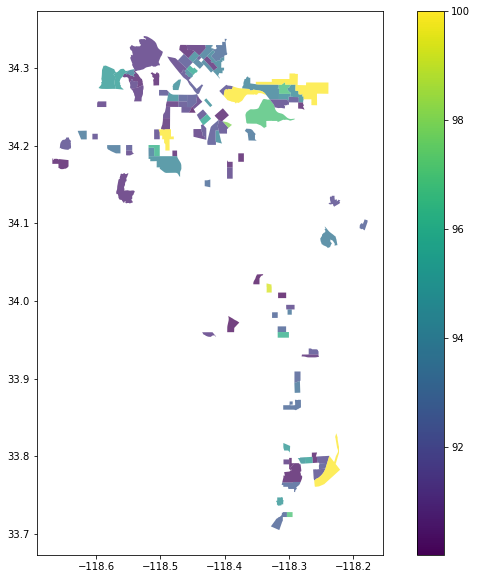

In [30]:
car_pt90.plot(figsize=(12,10),
                 column='%Car Total',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 legend=True, 
               )

## High Car Neighborhoods for Consideration 

In [31]:
car_pt90['Neighborhood'].value_counts()

Sylmar               15
Wilmington            8
Sun Valley            5
Granada Hills         5
Porter Ranch          5
North Hills           4
Tujunga               4
San Pedro             4
Harbor Gateway        3
Lake Balboa           3
Harbor City           3
Panorama City         3
Arleta                3
Sunland               3
Mission Hills         3
Pacoima               3
Van Nuys              2
North Hollywood       2
Green Meadows         2
Westchester           2
Reseda                2
West Hills            2
Chatsworth            2
Vermont-Slauson       2
Hansen Dam            1
San Fernando          1
Montecito Heights     1
Glassell Park         1
Sepulveda Basin       1
Tarzana               1
Vermont Square        1
Shadow Hills          1
Hyde Park             1
Winnetka              1
Valley Village        1
Elysian Park          1
Woodland Hills        1
Canoga Park           1
West Adams            1
Sherman Oaks          1
Lake View Terrace     1
Manchester Squar

By Region:
    
San Fernando Valley:
* Sylmar (15)
* Granada Hills (5)
* Sun Valley (5)
* Porter Ranch (5)
* North Hills (4)
* Panorama City (3)
* Pacoima (3)
* Lake Balboa (3)
* Arleta
* Mission Hills (3)
* North Hollywood (2)
* Van Nuys (2)
* Chatworth (2)
* Reseda (2)
* West Hills (2)

The Verdugos
* Tujunga 4
* Sunland (3)

Harbor Region:
* Wilmington (8)
* San Pedro (4)

South LA
* Vermont-Slauson (2)
* Green Meadows (2)

South Bay
* Westchester (2)

For our control neighborhoods we chose to stay away from the SF Valley neighborhoods and focus on other parts of LA. Additionally, are already selected trasnit heavy SV Valley neighborhoods have high car use tracts that we can look into as well. Ultimately we chose Wilmington and Vermont-Slauson. 

# New Percent Columns

In [32]:
m2w_income_race['Percent Bus'] = m2w_income_race['Bus']/m2w_income_race['Public transportation']*100
m2w_income_race['Percent Subway or elevated il'] = m2w_income_race['Subway or elevated il']/m2w_income_race['Public transportation']*100
m2w_income_race['Percent Long-distance train or commuter rail'] = m2w_income_race['Long-distance train or commuter rail']/m2w_income_race['Public transportation']*100
m2w_income_race['Percent Light rail'] = m2w_income_race['Light rail']/m2w_income_race['Public transportation']*100

In [33]:
m2w_income_race.head(4)

geoid                                   name Neighborhood  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      Tujunga   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      Tujunga   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      Tujunga   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA      Tujunga   

   Median Income  Total Workers Commuting  Car Total  Drove alone  Carpooled  \
0        63534.0                   2027.0     1860.0       1656.0      204.0   
1        90389.0                   1834.0     1730.0       1617.0      113.0   
2        44083.0                   3057.0     2699.0       2430.0      269.0   
3        43713.0                   1593.0     1439.0       1323.0      116.0   

   Public transportation   Bus  Subway or elevated il  \
0                   59.0  36.0                   23.0   
1                    9.0   0.0                    9.0   
2                   68.0  68.0                    0.0   
3                   48.0  48.0                    0.0   

   Long-distance train or commuter rail  Light rail  Worked from home  \
0                                   0.0         0.0              82.0   
1                                   0.0         0.0              77.0   
2                                   0.0         0.0             129.0   
3                                   0.0         0.0              68.0   

   %Car Total  %Drove alone  %Carpooled  %Public transportation      %Bus  \
0   91.761223     81.697089   10.064134                2.910705  1.776024   
1   94.329335     88.167939    6.161396                0.490731  0.000000   
2   88.289172     79.489696    8.799477                2.224403  2.224403   
3   90.332706     83.050847    7.281858                3.013183  3.013183   

   %Subway or elevated il  %Long-distance train or commuter rail  %Light rail  \
0                1.134682                                    0.0          0.0   
1                0.490731                                    0.0          0.0   
2                0.000000                                    0.0          0.0   
3                0.000000                                    0.0          0.0   

   %Worked from home  Total Pop Race   White  Black  Native  Asian  \
0           4.045387          4283.0  2616.0   19.0     3.0  331.0   
1           4.198473          3405.0  2882.0   74.0    15.0  220.0   
2           4.219823          6347.0  2986.0  198.0     0.0  486.0   
3           4.268675          3702.0  1812.0   87.0     0.0  341.0   

   Pacific Islander  Hispanic or Latino  %White  %Black  %Native  %Asian  \
0               3.0              1188.0   61.08    0.44     0.07    7.73   
1               0.0               147.0   84.64    2.17     0.44    6.46   
2               0.0              2616.0   47.05    3.12     0.00    7.66   
3               0.0              1364.0   48.95    2.35     0.00    9.21   

   %Pacific Islander  %Hispanic or Latino  \
0               0.07                27.74   
1               0.00                 4.32   
2               0.00                41.22   
3               0.00                36.84   

                                            geometry  Percent Bus  \
0  POLYGON ((-118.30229 34.25870, -118.30091 34.2...    61.016949   
1  POLYGON ((-118.30334 34.27371, -118.30330 34.2...     0.000000   
2  POLYGON ((-118.29945 34.25598, -118.29792 34.2...   100.000000   
3  POLYGON ((-118.28593 34.25227, -118.28592 34.2...   100.000000   

   Percent Subway or elevated il  \
0                      38.983051   
1                     100.000000   
2                       0.000000   
3                       0.000000   

   Percent Long-distance train or commuter rail  Percent Light rail  
0                                           0.0                 0.0  
1                                           0.0                 0.0  
2                                           0.0                 0.0  
3                   

# Visual Displays

**For multiple maps, I combine analysis from multiple maps to create a more complete picture**

## Prepping Data

Bring in more libraries!

In [34]:
# for interactive plots
import plotly.express as px

# to import open data,
from sodapy import Socrata

import urllib.request, json 

from shapely.geometry import Polygon

Prep data and ensure it's ready to go.

In [35]:
m2w_income_race.columns.to_list()

['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'geometry',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail']

In [36]:
#remove geometry
keep_df=['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail'
        ]

In [37]:
df = m2w_income_race [keep_df]

In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
df.sample(5)

geoid                                   name  \
696  14000US06037224320  Census Tract 2243.20, Los Angeles, CA   
927  14000US06037276500     Census Tract 2765, Los Angeles, CA   
777  14000US06037237900     Census Tract 2379, Los Angeles, CA   
901  14000US06037272202  Census Tract 2722.02, Los Angeles, CA   
165  14000US06037122122  Census Tract 1221.22, Los Angeles, CA   

          Neighborhood  Median Income  Total Workers Commuting  Car Total  \
696         Pico-Union        28616.0                   1485.0      883.0   
927        Westchester        91667.0                   2467.0     1044.0   
777  Manchester Square        51612.0                   1883.0     1570.0   
901          Mar Vista        63355.0                   2261.0     1845.0   
165         Sun Valley        41811.0                    965.0      854.0   

     Drove alone  Carpooled  Public transportation    Bus  \
696        575.0      308.0                  385.0  385.0   
927        964.0       80.0                   47.0   47.0   
777       1431.0      139.0                  132.0   85.0   
901       1707.0      138.0                  166.0  156.0   
165        748.0      106.0                   68.0   68.0   

     Subway or elevated il  Long-distance train or commuter rail  Light rail  \
696                    0.0                                   0.0         0.0   
927                    0.0                                   0.0         0.0   
777                   47.0                                   0.0         0.0   
901                   10.0                                   0.0         0.0   
165                    0.0                                   0.0         0.0   

     Worked from home  %Car Total  %Drove alone  %Carpooled  \
696             133.0   59.461279     38.720539   20.740741   
927             140.0   42.318606     39.075801    3.242805   
777              96.0   83.377589     75.995751    7.381837   
901             132.0   81.601061     75.497567    6.103494   
165              23.0   88.497409     77.512953   10.984456   

     %Public transportation       %Bus  %Subway or elevated il  \
696               25.925926  25.925926                0.000000   
927                1.905148   1.905148                0.000000   
777                7.010090   4.514073                2.496017   
901                7.341884   6.899602                0.442282   
165                7.046632   7.046632                0.000000   

     %Long-distance train or commuter rail  %Light rail  %Worked from home  \
696                                    0.0          0.0           8.956229   
927                                    0.0          0.0           5.674909   
777                                    0.0          0.0           5.098247   
901                                    0.0          0.0           5.838125   
165                                    0.0          0.0           2.383420   

     Total Pop Race   White   Black  Native  Asian  Pacific Islander  \
696          2972.0    81.0   240.0    24.0  116.0               0.0   
927          5674.0  3087.0   381.0    12.0  874.0              10.0   
777          4405.0   136.0  2966.0     0.0    0.0               0.0   
901          3359.0  1205.0   163.0    13.0  309.0              29.0   
165          2728.0   109.0     0.0     0.0   21.0               0.0   

     Hispanic or Latino  %White  %Black  %Native  %Asian  %Pacific Islander  \
696              2490.0    2.73    8.08     0.81    3.90               0.00   
927               956.0   54.41    6.71     0.21   15.40               0.18   
777              1151.0    3.09   67.33     0.00    0.00               0.00   
901              1386.0   35.87    4.85     0.39    9.20               0.86   
165              2598.0    4.00    0.00     0.00    0.77               0.00   

     %Hispanic or Latino  Percent Bus  Percent Subway or elevated il  \
696                83.78   100.000000                       0.000000   
927          

In [40]:
df.shape

(1004, 40)

Data is ready to go.

## Central LA

In [41]:
import plotly.io as pio

### Downtown

Will now dive into Downtown. Will query and define this data set. I will be combining some of the analysis between charts where appropriate, and thus in some case will not give a description for every chart or map.

In [42]:
dtown= df.query("Neighborhood == 'Downtown'")

In [43]:
dtown.shape

(14, 40)

In [44]:
type(dtown)

pandas.core.frame.DataFrame

### Racial Breakdown

In [45]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["%Hispanic or Latino","%White","%Black",'%Asian','%Native','%Pacific Islander'],
             title='Downtown Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [46]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["Hispanic or Latino","White","Black",'Asian','Native','Pacific Islander'],
             title='Downtown Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [47]:
#Well this worked for one day, and now its not. At this pace, I'm going to resort to png of these
#fig.write_html("dtown_race.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [48]:
pio.write_html(fig, file='dtown_race_plotly.html', auto_open=True)

In [49]:
dtown['%Hispanic or Latino'].describe()['50%']

18.54

In [50]:
dtown['%White'].describe()['50%']

25.435000000000002

In [51]:
dtown['%Asian'].describe()['50%']

22.755

In [52]:
dtown['%Black'].describe()['50%']

14.48

Analysis of the above charts and outputs:

Downtown is fairly evenly distributed. The median across census tracts is 18 percent Hispanic, 25 percent White, 22 percent Asian, and 14 percent Black. There appear to be pockets of heavy racial concentration. Census tracts with most public transit usage typically have larger Black or Hispanic populations.    

In [53]:
fig = px.bar(dtown, 
             y='geoid', 
             x="Median Income",
             title='Downtown Median Income',
             color_discrete_sequence=['#B6E880'],
             orientation='h',
             labels={
                     "geoid": "Census Tracts",
                     "Median Income": "Median Income",
                                      })
fig.show()

In [54]:
fig.write_html("dtwon_median_income_plotly.html")

In [55]:
#fig.write_html("dtwon_median_income_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [56]:
dtown['Median Income'].describe()['50%']

39517.5

Downtown: wide range from 9,191 to a 100K, median income across all Downtown tracts is $39,517. Tracts with high public transit use are typically lower median incomes, but the wealthiest track also had significant public transit use (24 percent).

In [57]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["Car Total","Public transportation",],
             title='Downtown Mode of Trasnportation',
             color_discrete_sequence=px.colors.qualitative.D3,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [58]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["%Car Total","%Public transportation",],
             title='Downtown Mode of Trasnportation',
             color_discrete_sequence=px.colors.qualitative.D3,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

For both of the above: few tracts with larger percenties of transit users, aboslute totals are still low. Most concentrated transit tract has has the lowest worker population.

In [59]:
fig.write_html("dtown_m2w_plotly.html")

In [60]:
#fig.write_html("dtown_m2w_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [61]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["Percent Bus","Percent Subway or elevated il","Percent Long-distance train or commuter rail",'Percent Light rail'],
             title='Downtown Mode of Trasnportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [62]:
fig.write_html("dtown_m2w_transit_only_plotly.html")

In [63]:
#fig.write_html("dtown_m2w_transit_only_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [64]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["Bus","Percent Subway or elevated il","Long-distance train or commuter rail",'Light rail'],
             title='Downtown Mode of Trasnportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [65]:
fig.write_html("pu_m2w_transitonly_counts_plotly.html")

In [66]:
#fig.write_html("pu_m2w_transitonly_counts_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [67]:
fig = px.bar(dtown, 
             x="geoid", 
             y=["%Car Total","%Bus","%Subway or elevated il",'%Long-distance train or commuter rail','%Light rail','%Worked from home'],
             title='Downtown Mode of Trasnportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

Analysis of the above: Majority bus for the most part, where there is transit with subway, again, aboslute toals are staggeringly low and makes me think twice of including rail maps. 

Text(0.5, 0.98, 'Downtown Overview')

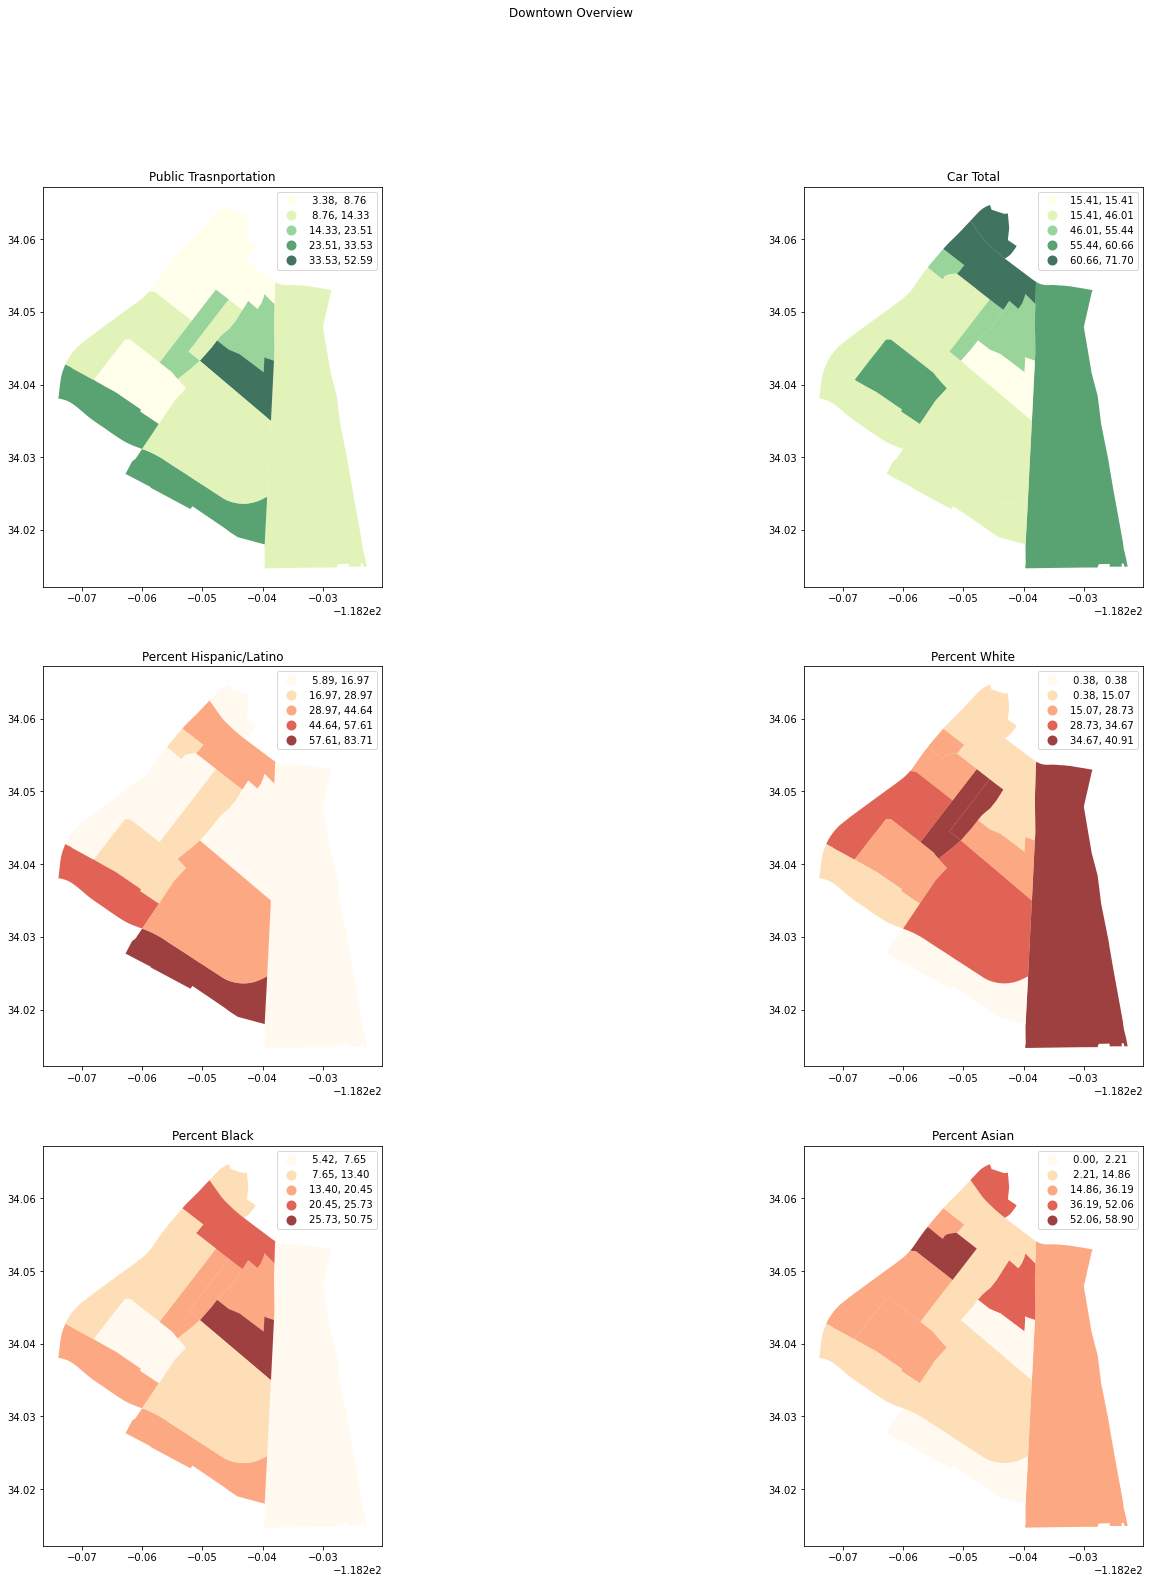

In [68]:
##next week, work on bins
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# name each subplot
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%Public transportation',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax1, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax1.set_title('Public Trasnportation')

m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%Car Total',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                  ax=ax2, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax2.set_title('Car Total')


m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%Hispanic or Latino',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax3, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax3.set_title('Percent Hispanic/Latino')


m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%White',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax4, 
                 legend=True, 
                 scheme='NaturalBreaks',)

ax4.set_title('Percent White')


m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%Black',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax5, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax5.set_title('Percent Black')


m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='%Asian',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax6, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax6.set_title('Percent Asian')

fig.suptitle('Downtown Overview')

A lot going on here. I could probably just foucs on this these set of maps for the entire project and really go into the details. ALl of which I seem to know now. Lesson learned. Pockets of race is despersed among tracts. Highest use of transit in this neighborhood are tracts that have strong Black and Hispanic populations.

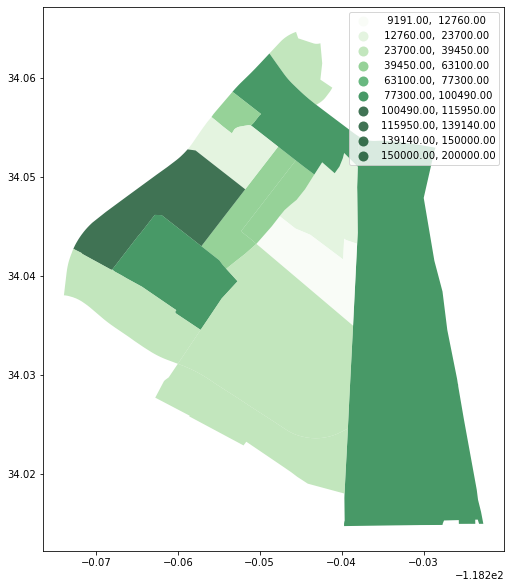

In [69]:
m2w_income_race.query("Neighborhood == 'Downtown'").plot(figsize=(12,10),
                 column='Median Income',
                 cmap='Greens',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 scheme='UserDefined',
                classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000]),
                 legend=True, 
               )


Low income is largely Black population tract, higher median incomes in White population tracts. Fairly wide disperal among tracts.

## Pico-Union

In [70]:
pu= df.query("Neighborhood == 'Pico-Union'")

In [71]:
pu.shape

(14, 40)

In [72]:
type(pu)

pandas.core.frame.DataFrame

In [73]:
fig = px.bar(pu, 
             x="geoid", 
             y=["%Hispanic or Latino","%White","%Black",'%Asian','%Native','%Pacific Islander'],
             title='Pico-Union Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [74]:
fig.write_html("pu_race_plotly.html")

In [75]:
#fig.write_html("pu_race_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [76]:
fig = px.bar(pu, 
             x="geoid", 
             y=["Hispanic or Latino","White","Black",'Asian','Native','Pacific Islander'],
             title='Pico-Union Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [77]:
pu['%Asian'].describe()['50%']

6.8549999999999995

In [78]:
pu['%Hispanic or Latino'].describe()['50%']

86.975

Analysis: 
    
Pico-Union—Virtually all Hispanic with tracts ranging from 64 to 96 percent. Other races and ethnicities are fairly minimal, though there are three tracts with much larger Asian population that range from 20 to 30 percent.

In [79]:
fig = px.bar(pu, 
             y='geoid', 
             x="Median Income",
             title='Pico-Union Median Income',
             color_discrete_sequence=['#B6E880'],
             orientation='h',
             labels={
                     "geoid": "Census Tracts",
                     "Median Income": "Median Income",
                                      })
fig.show()

In [80]:
pu['Median Income'].describe()['50%']


34018.0

In [81]:
fig.write_html("pu_median_income_plotly.html")

In [82]:
#fig.write_html("pu_median_income_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Pico-Union: median income ranges about 26K to 48K across tracts. Median among these tracts is $34,018. No extreme or unusual patterns between transit use and median, transit use is fairly consistent across tracts. 

In [83]:
fig = px.bar(pu, 
             x="geoid", 
             y=["%Car Total","%Public transportation",],
            color_discrete_sequence=px.colors.qualitative.D3,
             title='Pico-Union Mode of Trasnportation',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [84]:
#fig.write_html("pu_m2w_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [85]:
fig.write_html("pu_m2w_plotly.html")

In [86]:
fig = px.bar(pu, 
             x="geoid", 
             y=["Percent Bus","Percent Subway or elevated il","Percent Long-distance train or commuter rail",'Percent Light rail'],
             title='Pico-Union Mode of Transportation',
              color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [87]:
fig.write_html("pu_m2w_tranit_only_plotly.html")

In [88]:
#fig.write_html("pu_m2w_tranit_only_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [89]:
fig = px.bar(pu, 
             x="geoid", 
             y=["Bus","Subway or elevated il","Long-distance train or commuter rail",'Light rail'],
             title='Pico-Union Mode of Transportation',
              color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

Analysis of transit: Pretty significant numbers using transit, in relaitve terms, strong majorities using bus, liekly has few train stations, or pherhaps the best is of better serivce to job location.

In [90]:
fig.write_html("pu_m2w_transitonly_counts_plotly.html")

In [91]:
#fig.write_html("pu_m2w_transitonly_counts_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Text(0.5, 0.98, 'Pico-Union Overview')

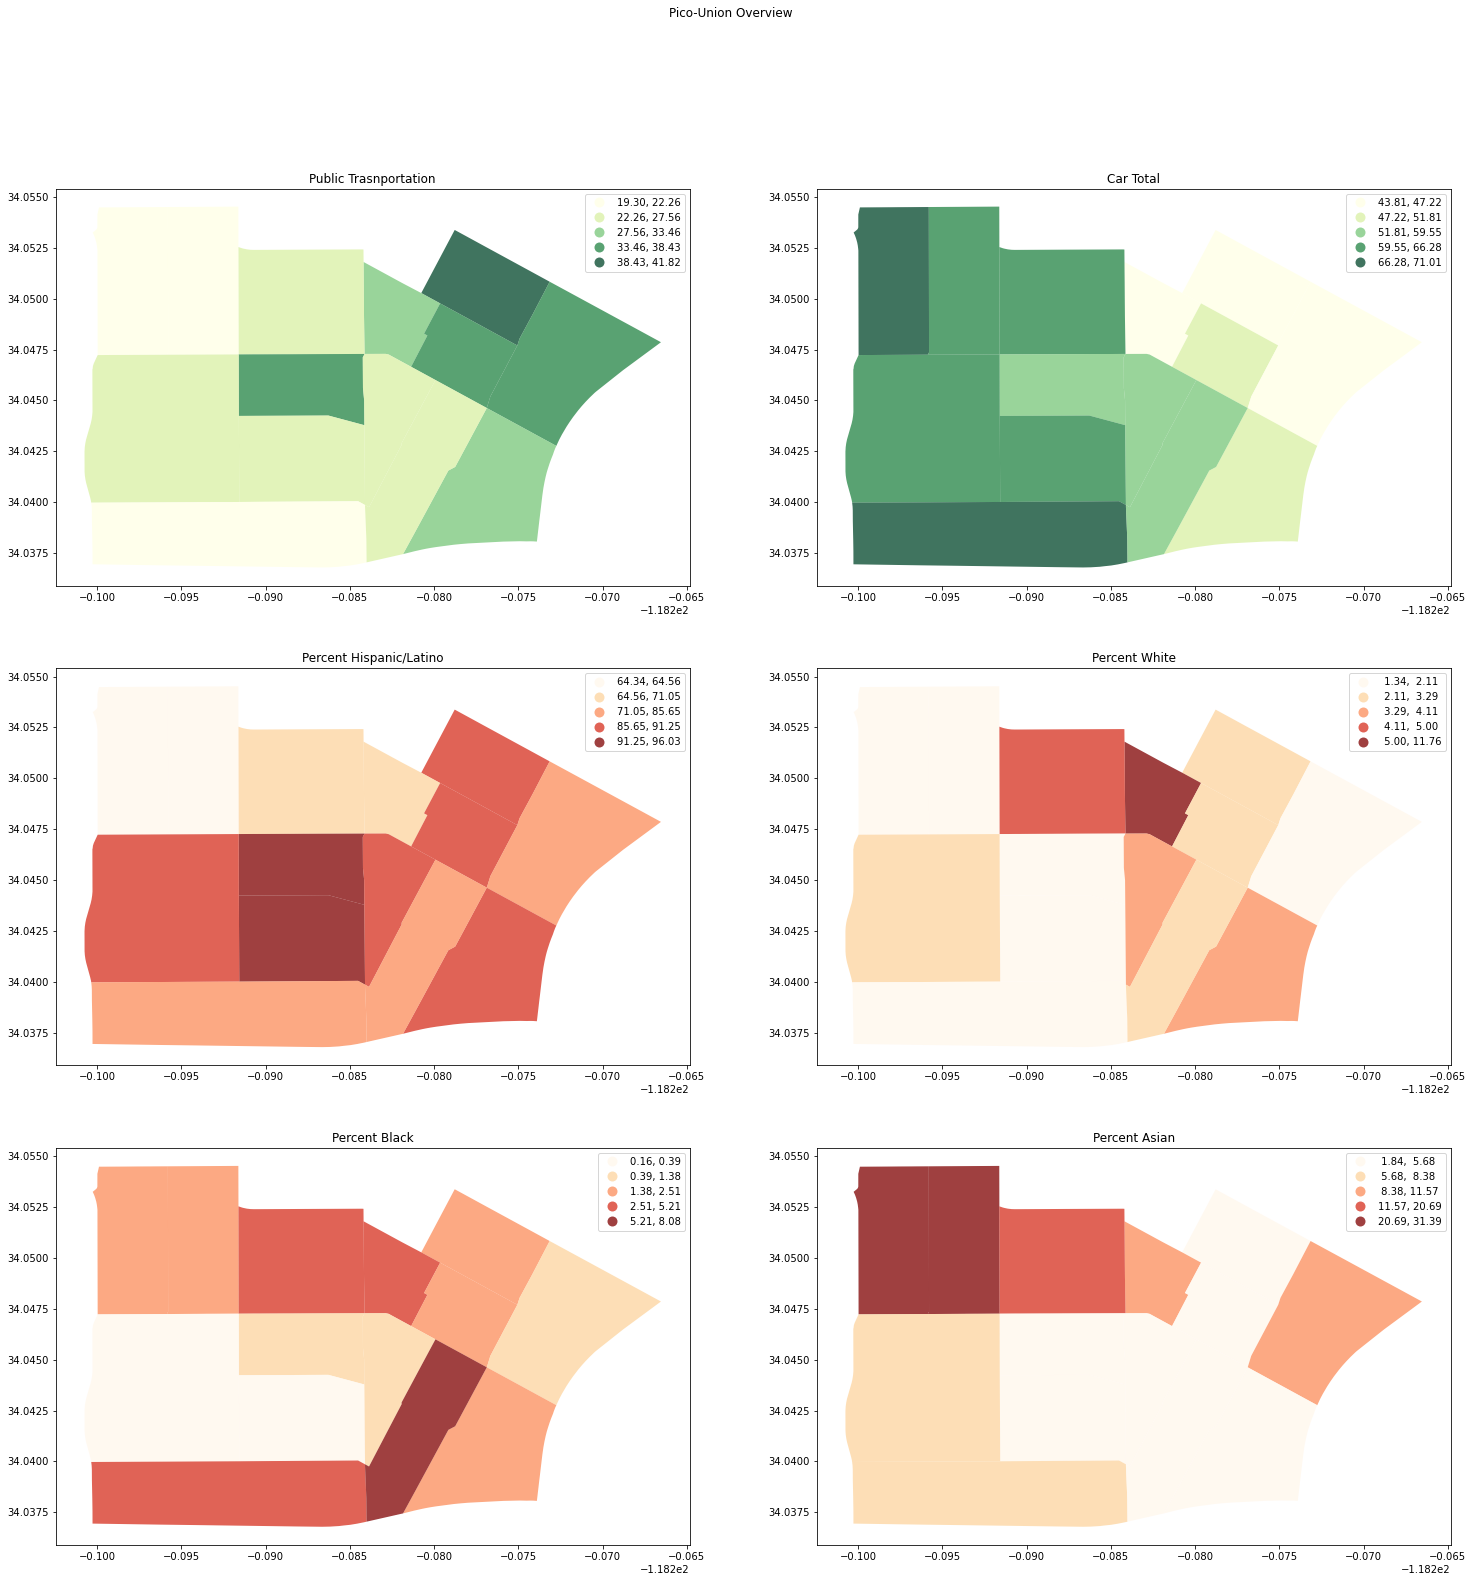

In [92]:
##next week, work on bins
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# name each subplot
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%Public transportation',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax1, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax1.set_title('Public Trasnportation')

m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%Car Total',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                  ax=ax2, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax2.set_title('Car Total')


m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%Hispanic or Latino',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax3, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax3.set_title('Percent Hispanic/Latino')


m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%White',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax4, 
                 legend=True, 
                 scheme='NaturalBreaks',)

ax4.set_title('Percent White')


m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%Black',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax5, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax5.set_title('Percent Black')


m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='%Asian',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax6, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax6.set_title('Percent Asian')

fig.suptitle('Pico-Union Overview')

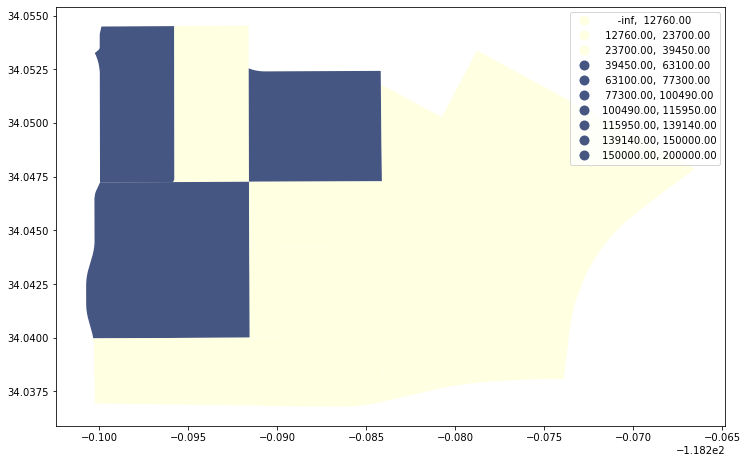

In [93]:
m2w_income_race.query("Neighborhood == 'Pico-Union'").plot(figsize=(12,10),
                 column='Median Income',
                 cmap='YlGnBu',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 scheme='UserDefined',
                classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000]),
                 legend=True, 
               )

Income is pretty evenly distibuted, in relative terms.Heaviest car use tracts have significant Asian, Black, and Hispanic populations. White population relatively small. This is a dominantly Hispanic nieghborhood. Tranist and income ranges seem less extreme on ends of the scale compared to the rest of the neighborhoods--missing large median incomes. 

### Mid-City

In [94]:
mc= df.query("Neighborhood == 'Mid-City'")

In [95]:
mc.shape

(14, 40)

In [96]:
type(mc)

pandas.core.frame.DataFrame

In [97]:
fig = px.bar(mc, 
             x="geoid", 
             y=["%Hispanic or Latino","%White","%Black",'%Asian','%Native','%Pacific Islander'],
             title='Mid City Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [98]:
#fig.write_html("mc_race_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [99]:
fig.write_html("mc_race_plotly.html")

In [100]:
fig = px.bar(mc, 
             x="geoid", 
             y=["Hispanic or Latino","White","Black",'Asian','Native','Pacific Islander'],
             title='Mid City Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [101]:
mc['%Hispanic or Latino'].describe()['50%']

51.370000000000005

In [102]:
mc['%White'].describe()['50%']

14.715

In [103]:
mc['%Black'].describe()['50%']

23.93

In [104]:
mc['%Asian'].describe()['50%']

5.73

Analysis: Mid-City—which is our “control” neighborhood given its low percentage of public transportation users. Large Hispanic and Black populations, respectively 51 percent and 23 percent across tracts. As expected from our control, public transportation use is strongly absent with median use across tracts resting at 9 percent. Out of the total public transportation users in one tract, subway rates use is 90 percent, but on closer inspection total public transportation users sits at a mere 43. 

In [105]:
fig = px.bar(mc, 
             y='geoid', 
             x="Median Income",
             title='Mid City Median Income',
             color_discrete_sequence=['#B6E880'],
             orientation='h',
             labels={
                     "geoid": "Census Tracts",
                     "Median Income": "Median Income",
                                      })
fig.show()

In [106]:
mc_50 = mc['Median Income'].describe()['50%']
mc_50

56166.0

In [107]:
fig.write_html("mc_median_income_plotly.html")

In [108]:
#fig.write_html("mc_median_income_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Mid-City: Another tract with a large range between 35K to 90K. No unusual variations in transportation use with income, car use is heavily present. m

In [109]:
fig = px.bar(mc, 
             x="geoid", 
             y=["%Car Total","%Public transportation",],
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Mid City Mode of Transportation',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [110]:
fig.write_html("mc_m2w_plotly.html")

In [111]:
#fig.write_html("mc_m2w_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [112]:
mc['%Public transportation'].describe()['50%']


9.308538349330098

In [113]:
fig = px.bar(mc, 
             x="geoid", 
             y=["Car Total","Public transportation",],
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Mid City Mode of Transportation',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [114]:
fig = px.bar(mc, 
             x="geoid", 
             y=["Percent Bus","Percent Subway or elevated il","Percent Long-distance train or commuter rail",'Percent Light rail'],
             title='Mid City Mode of Transportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [115]:
#fig.write_html("mc_m2w_transitonly_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [116]:
fig.write_html("mc_m2w_transitonly_plotly.html")

In [117]:
fig = px.bar(mc, 
             x="geoid", 
             y=["Bus","Subway or elevated il","Long-distance train or commuter rail",'Light rail'],
             title='Mid City Mode of Transportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

Analysis: I WAS initally exicted to see some subway use for one tract, but again, when looking at total population, numnbers are staggeringly low. Numbers are low as a whole, but this is our control neighborhood. 

In [118]:
fig.write_html("mc_m2w_transitonly_counts_plotly.html")

In [119]:
#fig.write_html("mc_m2w_transitonly_counts_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Text(0.5, 0.98, 'Mid-City Overview')

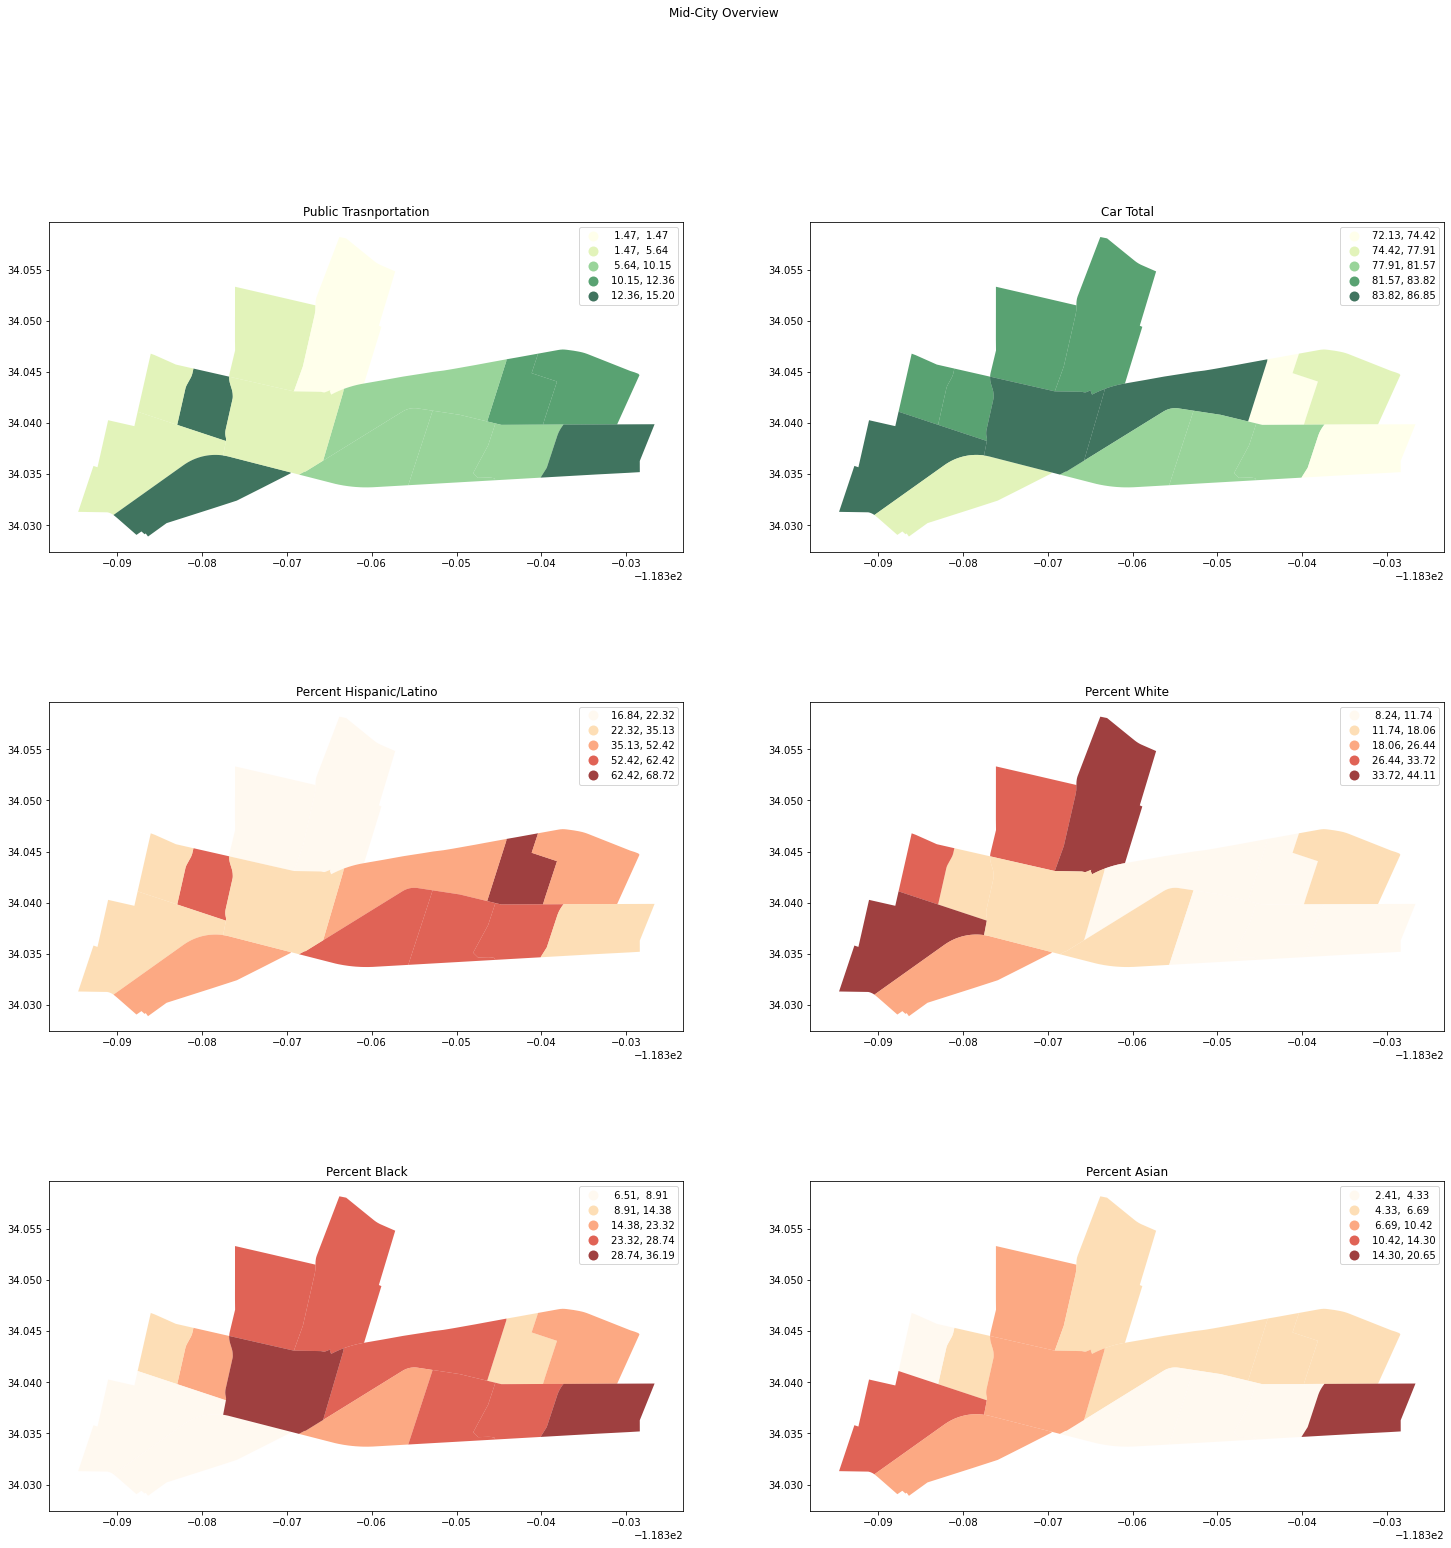

In [120]:
##next week, work on bins
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# name each subplot
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%Public transportation',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax1, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax1.set_title('Public Trasnportation')

m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%Car Total',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                  ax=ax2, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax2.set_title('Car Total')


m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%Hispanic or Latino',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax3, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax3.set_title('Percent Hispanic/Latino')


m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%White',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax4, 
                 legend=True, 
                 scheme='NaturalBreaks',)

ax4.set_title('Percent White')


m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%Black',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax5, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax5.set_title('Percent Black')


m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='%Asian',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax6, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax6.set_title('Percent Asian')

fig.suptitle('Mid-City Overview')

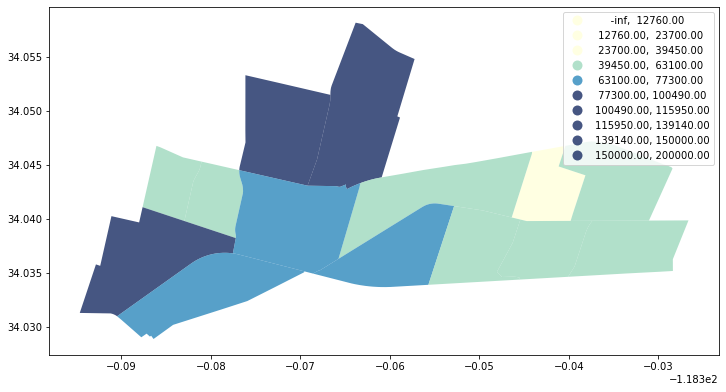

In [121]:
m2w_income_race.query("Neighborhood == 'Mid-City'").plot(figsize=(12,10),
                 column='Median Income',
                 cmap='YlGnBu',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 scheme='UserDefined',
                classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000]),
                 legend=True, 
               )

There are some higher income areas using transit, but these numbers are relatively tiny. What's the median income of transit users in this tract? Might not be apprpriate to make too many inferences given the small population using transit. 

## San Fernando Valley

### Panaroma City

In [122]:
paci= df.query("Neighborhood == 'Panorama City'")

In [123]:
paci.shape

(18, 40)

In [124]:
type(paci)

pandas.core.frame.DataFrame

In [125]:
fig = px.bar(paci, 
             x="geoid", 
             y=["%Hispanic or Latino","%White","%Black",'%Asian','%Native','%Pacific Islander'],
             title='Panorama City Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [126]:
#fig.write_html("paci_race_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [127]:
fig.write_html("paci_race_plotly.html")

In [128]:
fig = px.bar(paci, 
             x="geoid", 
             y=["Hispanic or Latino","White","Black",'Asian','Native','Pacific Islander'],
             title='Panorama City Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [129]:
paci['%Hispanic or Latino'].describe()['50%']

73.495

In [130]:
paci['%Asian'].describe()['50%']

15.68

In [131]:
paci['%White'].describe()['50%']

7.574999999999999

Analysis:
    
Panorama City—Majority Hispanic population in Panorama City, numbers not as high Pico-Union, with significant portions of Asian and White populations across tracts at 16 and 8 percent. Public transit use is obviously not as high as our Central LA neighborhoods excluding our control neighborhood. Those using public transit are dominantly Hispanic tracts.

In [132]:
fig = px.bar(paci, 
             y='geoid', 
             x="Median Income",
             title='Panorama City Median Income',
             color_discrete_sequence=['#B6E880'],
             orientation='h',
             labels={
                     "geoid": "Census Tracts",
                     "Median Income": "Median Income",
                                      })
fig.show()

In [133]:
paci['Median Income'].describe()['50%']


43495.5

In [134]:
fig.write_html("paci_median_income_plotly.html")

In [135]:
#fig.write_html("paci_median_income_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Panorama City: Range from 28 to 81K. Public transportation is low in most tracts, areas with largest use between 39 and 49K.

In [136]:
fig = px.bar(paci, 
             x="geoid", 
             y=["%Car Total","%Public transportation",],
            color_discrete_sequence=px.colors.qualitative.D3,
             title='Panorama City Mode of Transportation',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [137]:
fig.write_html("paci_m2w_plotly.html")

In [138]:
#fig.write_html("paci_m2w_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [139]:
fig = px.bar(paci, 
             x="geoid", 
             y=["Percent Bus","Percent Subway or elevated il","Percent Long-distance train or commuter rail",'Percent Light rail'],
             title='Panorama City Mode of Transportation',
              color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [140]:
fig.write_html("paci_m2w_transitonly_plotly.html")

In [141]:
#fig.write_html("paci_m2w_transitonly_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [142]:
fig = px.bar(paci, 
             x="geoid", 
             y=["Bus","Subway or elevated il","Long-distance train or commuter rail",'Light rail'],
             title='Panorama City Mode of Transportation',
              color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Worker Counts",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

Analysis: All bus. Just all bus. Proportioally, very small in comparison to the rest of the population o each tract. Still significant for the SF Valley

In [143]:
fig.write_html("paci_m2w_transitonly_counts_plotly.html")

In [144]:
#fig.write_html("paci_m2w_transitonly_counts_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Text(0.5, 0.98, 'Panorama City Overview')

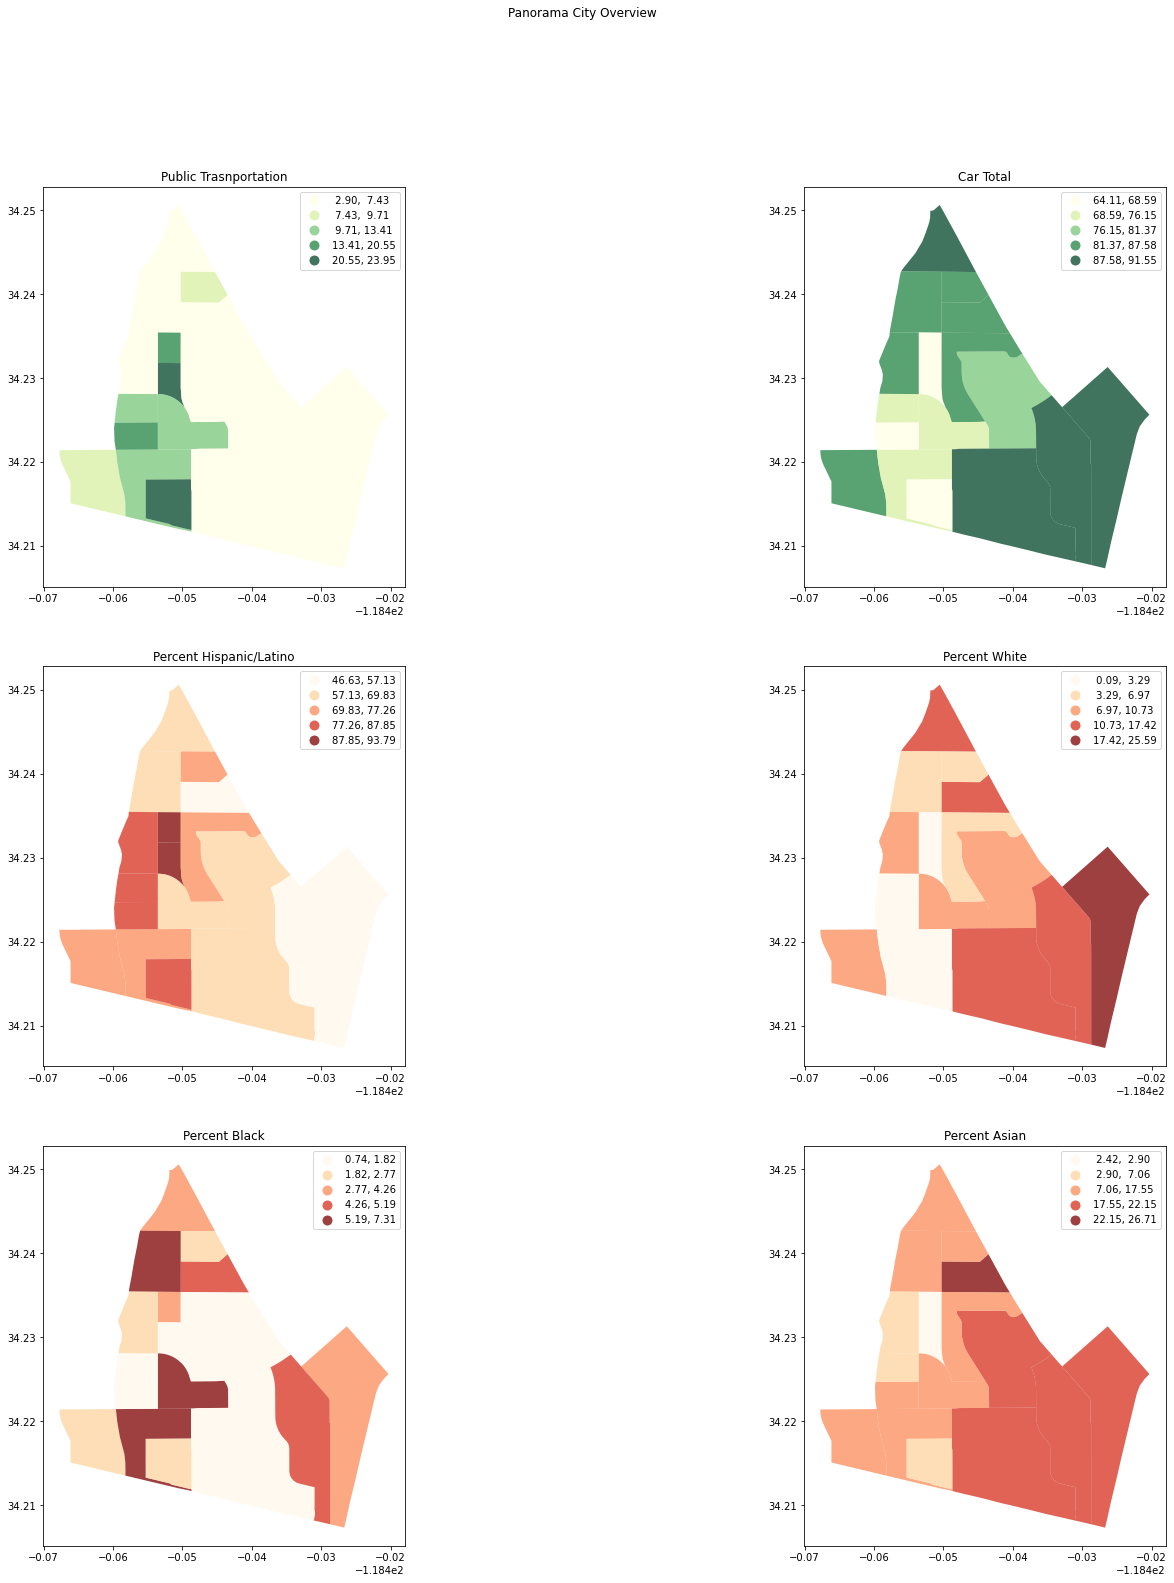

In [145]:
##next week, work on bins
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# name each subplot
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%Public transportation',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax1, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax1.set_title('Public Trasnportation')

m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%Car Total',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                  ax=ax2, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax2.set_title('Car Total')


m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%Hispanic or Latino',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax3, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax3.set_title('Percent Hispanic/Latino')


m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%White',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax4, 
                 legend=True, 
                 scheme='NaturalBreaks',)

ax4.set_title('Percent White')


m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%Black',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax5, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax5.set_title('Percent Black')


m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='%Asian',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax6, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax6.set_title('Percent Asian')

fig.suptitle('Panorama City Overview')

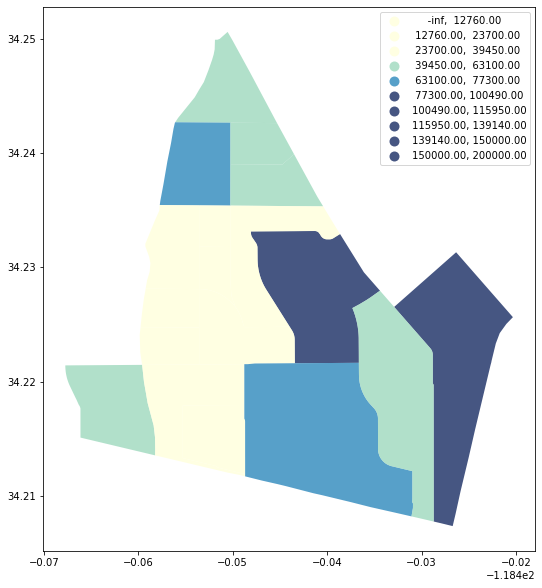

In [146]:
m2w_income_race.query("Neighborhood == 'Panorama City'").plot(figsize=(12,10),
                 column='Median Income',
                 cmap='YlGnBu',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 scheme='UserDefined',
                classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000]),
                 legend=True, 
               )

Transit use is heavier in Black, Hispnaic, Asian, non-White tracts. Income is in largely white tracts, there is a heavy strong Asian population in this tract as well. 

### North Hollywood

In [147]:
nhwood= df.query("Neighborhood == 'North Hollywood'")

In [148]:
nhwood.shape

(22, 40)

In [149]:
type(nhwood)

pandas.core.frame.DataFrame

In [150]:
fig = px.bar(nhwood, 
             x="geoid", 
             y=["%Hispanic or Latino","%White","%Black",'%Asian','%Native','%Pacific Islander'],
             title='North Hollywood Racial/Ethnic Breakdown',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Race/Ethnicity"
                 },
             )
fig.show()

In [151]:
fig.write_html("nhwood_race_plotly.html")

In [152]:
#fig.write_html("nhwood_race_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [153]:
nhwood['%Asian'].describe()['50%']

6.265000000000001

In [154]:
nhwood['%Black'].describe()['50%']

4.21

In [155]:
nhwood['%White'].describe()['50%']

30.225

In [156]:
nhwood['%Hispanic or Latino'].describe()['50%']

56.004999999999995

Analysis:

North Hollywood—large Hispanic and White populations across census tracts, 56 and 30 percent across census tracts. This has the most significant White population among our chosen neighborhoods. Transportation use as a whole is fairy dismal but constant through all tracts staying in the single digits. 

In [157]:
fig = px.bar(nhwood, 
             y='geoid', 
             x="Median Income",
             title='North Hollywood Median Income',
             color_discrete_sequence=['#B6E880'],
             orientation='h',
             labels={
                     "geoid": "Census Tracts",
                     "Median Income": "Median Income",
                                      })
fig.show()

In [158]:
fig.write_html("nhwood_median_income_plotly.html")

In [159]:
#fig.write_html("nhwood_median_income_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [160]:
nhwood_50 = nhwood['Median Income'].describe()['50%']
nhwood_50

47808.5

North Hollywood: median 23 to 80k, but no patterns associated with public transit use.  

In [161]:
fig = px.bar(nhwood, 
             x="geoid", 
             y=["%Car Total","%Public transportation",],
            color_discrete_sequence=px.colors.qualitative.D3,
             title='North Hollywood Mode of Transportation',
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [162]:
fig.write_html("nhwood_m2w_plotly.html")

In [163]:
#fig.write_html("nhwood_m2w_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [164]:
fig = px.bar(nhwood, 
             x="geoid", 
             y=["%Car Total","%Bus","%Subway or elevated il",'%Long-distance train or commuter rail','%Light rail','%Worked from home'],
             title='North Hollywood Mode of Transportation',
             color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [165]:
fig = px.bar(nhwood, 
             x="geoid", 
             y=["Percent Bus","Percent Subway or elevated il","Percent Long-distance train or commuter rail",'Percent Light rail'],
             title='North Hollywood Mode of Transportation',
            color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

In [166]:
fig.write_html("nhwood_m2w_transitonly_plotly.html")

In [167]:
#fig.write_html("nhwood_m2w_transitonly_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

In [168]:
nhwood["Percent Bus"].describe()['50%']

55.871212121212125

In [169]:
nhwood["Percent Subway or elevated il"].describe()['50%']

36.755612808244386

In [170]:
fig = px.bar(nhwood, 
             x="geoid", 
             y=["Bus","Subway or elevated il","Long-distance train or commuter rail",'Light rail'],
             title='North Hollywood Mode of Transportation',
            color_discrete_sequence=px.colors.qualitative.D3_r,
             labels={
                     "geoid": "Census Tracts",
                     "value": "Percentage",
                     "variable": "Mode of Transportation"
                 },
             )
fig.show()

Analysis: I know by know not to get exicted by subways rates. Though these are a little higher, than the rest. Will contribute that to a nearby subway statiion. May be good to map.  

In [171]:
fig.write_html("nhwood_m2w_transitonly_counts_plotly.html")

In [172]:
#fig.write_html("nhwood_m2w_transitonly_counts_plotly.html")
#print(plotly.offline.plot([trace], include_plotlyjs=False, output_type='div'))

Text(0.5, 0.98, 'North Hollywood Overview')

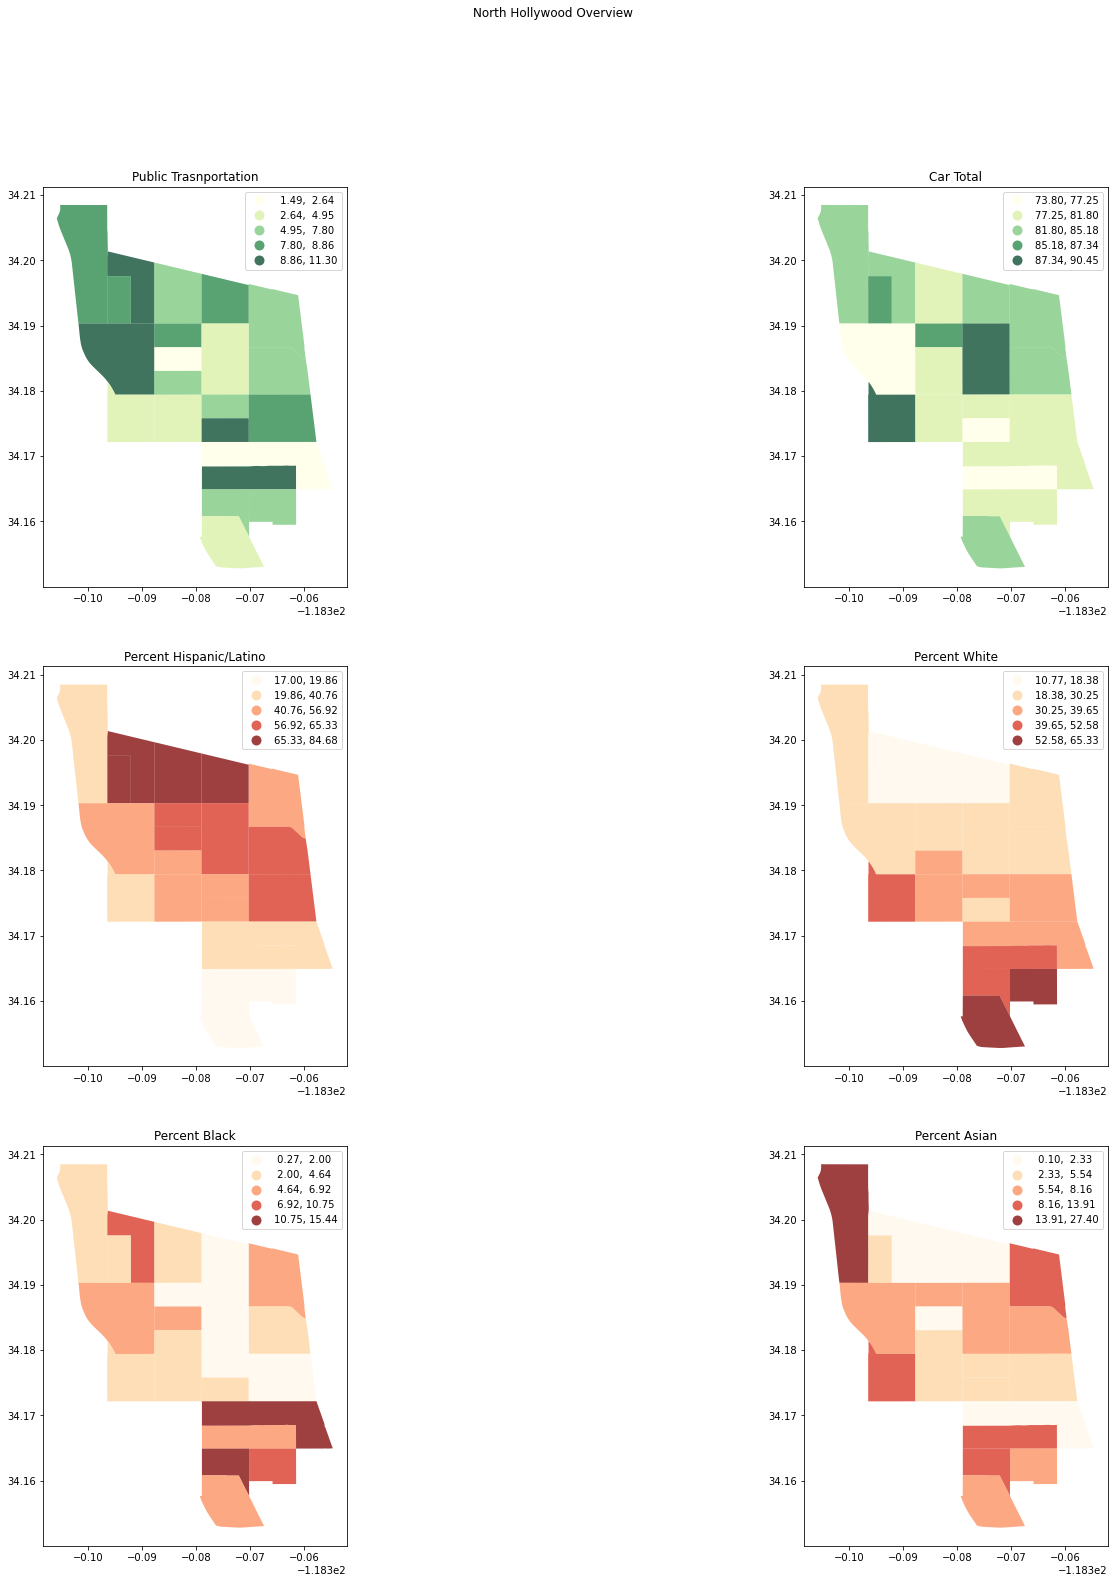

In [173]:
##next week, work on bins
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# name each subplot
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%Public transportation',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax1, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax1.set_title('Public Trasnportation')

m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%Car Total',
                 cmap='YlGn',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                  ax=ax2, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax2.set_title('Car Total')


m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%Hispanic or Latino',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax3, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax3.set_title('Percent Hispanic/Latino')


m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%White',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax4, 
                 legend=True, 
                 scheme='NaturalBreaks',)

ax4.set_title('Percent White')


m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%Black',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax5, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax5.set_title('Percent Black')


m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='%Asian',
                 cmap='OrRd',
                 edgecolor='white', 
                 linewidth=0., 
                 alpha=0.75, 
                 ax=ax6, 
                  legend=True, 
                 scheme='NaturalBreaks',)

ax6.set_title('Percent Asian')

fig.suptitle('North Hollywood Overview')

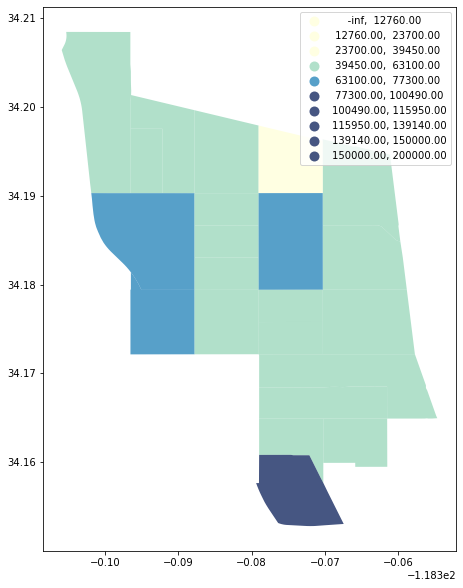

In [174]:
m2w_income_race.query("Neighborhood == 'North Hollywood'").plot(figsize=(12,10),
                 column='Median Income',
                 cmap='YlGnBu',
                 edgecolor='black', 
                 linewidth=0., 
                 alpha=0.75, 
                 scheme='UserDefined',
                classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000]),
                 legend=True, 
               )

Highest median income area is also strongly White. Transit use is strongest in the NW corner of the neighborhood which has strong Hispanic and Asian populations, income is on the lower end for thee as well.